## Unit 1 capstone project



In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [50]:
def retrieveNonNegative(x):
    return (x >= 0)

In [51]:
def retrieve_NonNegative_list(lst):
    new_list = []
    for x in lst:
        new_list.append(x >= 0)
    return new_list

In [52]:
def dataFrame_filter_row(df, colname, func):
    print(df[colname])
    print(func(df[colname]))
    filter_list = func(df[colname])
    new_df = df.loc[(filter_list)]
    return new_df

##  read in data
>

In [59]:
df_customer = pd.read_csv("../data-201-resources-master/customers_data.csv")

In [60]:
df_customer.head(4)

,Unnamed: 0,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty
0,0,19.58,male,no,31.0,35.0,False
1,1,65.16,male,yes,23.0,61.0,False
2,2,40.60,female,no,36.0,49.0,False
3,3,38.01,male,yes,47.0,57.0,False


## clean negative values, NA,  until values look reasonable.

>

In [61]:
print('removing negative age......')
df_temp = df_customer[retrieve_NonNegative_list(df_customer['age'])] 
print('removing negative purchase amount......')                         
df = df_temp[retrieve_NonNegative_list(df_temp['purch_amt'])]

removing negative age......
removing negative purchase amount......


## verify the data are in the reasonable range 
>

In [62]:
print('The gender')
print(df['gender'].sort_values(ascending=True).unique())
print('The card_on_file')
print(df['card_on_file'].sort_values(ascending=True).unique())
print('The bool values of loyalty')
print(df['loyalty'].sort_values(ascending=True).unique())
print('The minimum purchase amount is {}'.format(df['purch_amt'].sort_values(ascending=True).min()))
print('The maximum purchase amount is {}'.format(df['purch_amt'].sort_values(ascending=True).max()))
print('The minimum age is {}'.format(df['age'].sort_values(ascending=True).min()))
print('The maximum age is {}'.format(df['age'].sort_values(ascending=True).max()))
print('The minimum days_since_last_purch is {}'.format(df['days_since_last_purch'].sort_values(ascending=True).min()))
print('The maximum days_since_last_purch is {}'.format(df['days_since_last_purch'].sort_values(ascending=True).max()))

The gender
['female' 'male']
The card_on_file
['no' 'yes']
The bool values of loyalty
[False  True]
The minimum purchase amount is 0.01
The maximum purchase amount is 142.2
The minimum age is -0.0
The maximum age is 71.0
The minimum days_since_last_purch is -9.0
The maximum days_since_last_purch is 125.0


## during rollout, the data is collected unbiased over gender and age.

     The first plots show the purchase amount distribution breaking by gender. Statistically
     the distributions are similar.
     
     The second plots show distribution of averaged purchase amount over age. It is pretty flat,
     no clear bias for specific age group.
     

<Figure size 1440x1080 with 0 Axes>

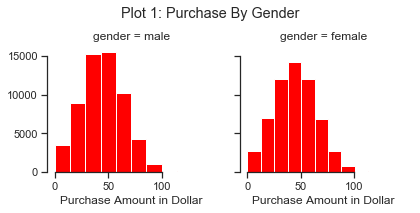

In [63]:
plt.figure(figsize=(20,15))
sns.set(style="ticks")
graph = sns.FacetGrid(df, col="gender")
graph.map(plt.hist, "purch_amt", color="red")
plt.subplots_adjust(top=0.8)
graph.set_axis_labels("Purchase Amount in Dollar")
plt.suptitle("Plot 1: Purchase By Gender")
sns.despine(trim=True)
plt.show()

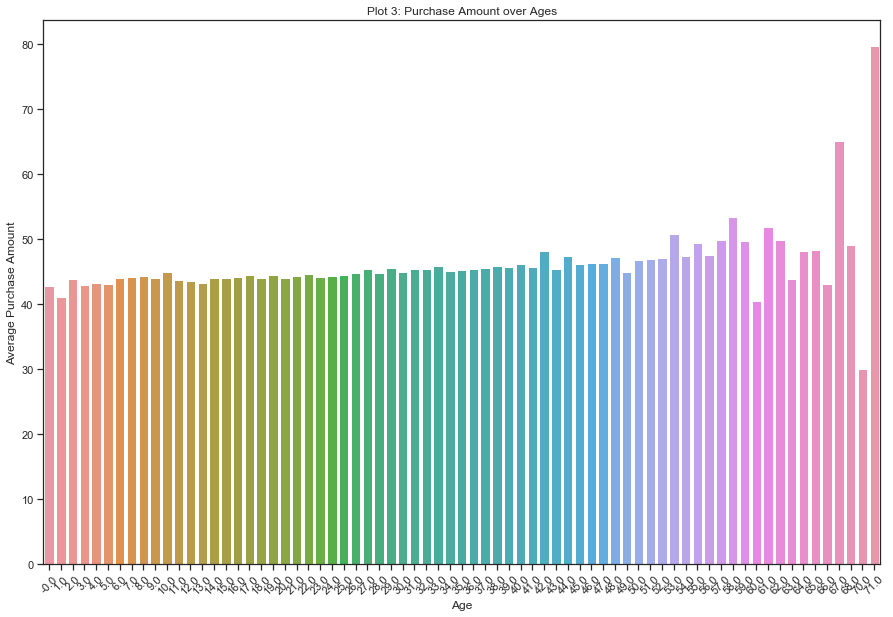

In [64]:
df_agesort = df.groupby(['age']).mean()
temp = df['age'].sort_values(ascending=True).unique()
df_agesort['age'] = temp

plt.figure(figsize=(15,10))
sns.barplot(x=df_agesort['age'], y=df_agesort['purch_amt'])
plt.xticks(rotation=45)
plt.xlabel('Age')
plt.ylabel('Average Purchase Amount')
plt.title('Plot 3: Purchase Amount over Ages')
plt.show()

## A/B test 1:     Does card_on_file make significant difference in customers' purchase amount    

In [ ]:
plt.figure(figsize=(15,10))
graph = sns.lmplot(x='age', y='purch_amt', data=df_customer, fit_reg=False, scatter_kws={'alpha':0.4})
graph.set_xlabels('age')
graph.set_ylabels('purchase amount')
plt.title('Plot 1: scatter Plot of Purchase Amount vs. Age')
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
sns.set(style="ticks")
graph = sns.FacetGrid(df_customer, row="loyalty", col="card_on_file")
graph.map(plt.hist, "purch_amt", color="steelblue")
plt.subplots_adjust(top=0.9)
graph.set_axis_labels("Purchase Amount in Dollar")
plt.suptitle("Plot 2: Purchase By loyalty and Card")
sns.despine(trim=True)
plt.show()

Choose one variable and plot that variable four different ways. 
1) histogram plots
2) histogram plots by gender and loyalty
3) barplot 
4) pointplot


In [ ]:
maleamt = df_customer.loc[(df_customer['gender']=='male'), 'purch_amt']
femaleamt = df_customer.loc[(df_customer['gender']=='female'), 'purch_amt']
                         
plt.figure(figsize=(15,10))
plt.hist(maleamt, bins=100, color='green', label='male')
plt.legend(loc='upper right')
plt.hist(femaleamt, bins=100, color='red', label='female')
plt.legend(loc="upper right")
plt.xlabel('Purchase Amount in Dollar')
plt.ylabel('Frequency')
plt.title('Plot 1: Purchase Amount Distribution')

In [ ]:
axe = sns.boxplot(x='gender', y='purch_amt', hue='card_on_file', data=df_customer)
plt.title("Plot 4: Purchase by Gender and Card_On_file")
sns.despine(offset=10, trim=True)
axe.set(xlabel='', ylabel='purchase amount')
plt.show()

## Choose two continuous variables, and plot them three different ways. 1_ scatter plot 2) barplot 3) poitplot

In [ ]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
graph = sns.catplot(x='age', y='purch_amt', data=df_customer,
                        height=6, kind='bar', palette='pastel', ci=95)
graph.despine()
graph.set_xlabels("age")
graph.set_ylabels("purchase_amount")
plt.title("Plot 2: barplot of Purchase Amount vs. Age")
plt.show()

In [ ]:
sns.set(style='whitegrid')
graph = sns.catplot(x='age', y='purch_amt', hue='card_on_file', data=df_customer,
                   height=8, kind='point', palette='pastel', ci=95, dodge=True, join=False)
graph.despine(left=True)
graph.set_xlabels('age')
graph.set_ylabels('purchase amount')
plt.title("Plot 3: pointplot of Purchase Amount vs. Age")
plt.show()

Choose one continuous variable and one categorical variable, and plot them six different ways.

In [ ]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
graph = sns.catplot(x='gender', y='purch_amt', hue='card_on_file', data=df_customer,
                        height=6, kind='bar', palette='pastel', ci=95)
graph.despine()
graph.set_xlabels("gender")
graph.set_ylabels("purchase_amount")
plt.title("Plot 2: barplot of Purchase Amount vs. Gender")
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
graph = sns.catplot(x='gender', y='purch_amt', hue='card_on_file', data=df_customer,
                        height=6, kind='point', palette='pastel', ci=95,dodge=True,join=False)
graph.despine()
graph.set_xlabels("gender")
graph.set_ylabels("purchase_amount")
plt.title("Plot 3: pointplot of Purchase Amount vs. Gender")
plt.show()

In [ ]:
axe = sns.boxplot(x='gender', y='purch_amt', hue='card_on_file', data=df_customer)
plt.title("Plot 4: Purchase by Gender and Card_On_file")
sns.despine(offset=10, trim=True)
axe.set(xlabel='', ylabel='purchase amount')
plt.show()

In [ ]:
df_agesort = df_customer.loc[df_customer['age']>0].groupby(['age']).mean()
temp = (df_customer.loc[(df_customer['age']>0), 'age'].sort_values(ascending=True).unique())
df_agesort['age'] = temp

plt.figure(figsize=(15,10))
graph = sns.lmplot(x='age', y='purch_amt', data=df_agesort, fit_reg=False, scatter_kws={'alpha':0.4})
plt.xticks(rotation=45)
graph.set_xlabels('Age')
graph.set_ylabels('Average Purchase Amount')
plt.title('Plot 5: scatter plot of Purchase Amount over Ages')
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
graph = sns.lmplot(x='age', y='purch_amt', data=df_agesort, fit_reg=True, scatter_kws={'alpha':0.4})
plt.xticks(rotation=45)
graph.set_xlabels('Age')
graph.set_ylabels('Average Purchase Amount')
plt.title('Plot 6: scatter plot of Purchase Amount over Ages')
plt.show()